In [2]:
import os
import math
import pandas
import numpy
import random
import statistics
import datetime
#import plotly
#import plotly.plotly as plot
#import plotly.graph_objs as plot_object
import matplotlib.pyplot

# <font color=pink>0. Setup </font>
 - set working directory
 - import data files

In [3]:
os.chdir("C:/Users/q0hecjrk/Documents/_Data/Iolanda/")


In [3]:
kaoma_df = pandas.read_csv("Inputs/Precipitation_Kaoma.csv")
kaoma_df['Date'] = -999
for index, row in kaoma_df.iterrows():
    kaoma_df.loc[index, 'Date'] = datetime.date(int(row['Year']), int(row['Month']), 1)
kaoma_df['DateTime'] = pandas.to_datetime(kaoma_df.Year.astype(str)+'-'+kaoma_df.Month.astype(str),format='%Y-%m')
kaoma_df.set_index('Date')
kaoma_df.head()

,Year,Month,Season,Precipitation,Date,DateTime
0,1961,1,1,242.5,1961-01-01,1961-01-01
1,1961,2,1,209.1,1961-02-01,1961-02-01
2,1961,3,1,97.6,1961-03-01,1961-03-01
3,1961,4,1,5.6,1961-04-01,1961-04-01
4,1961,5,0,0.0,1961-05-01,1961-05-01


# <font color = pink>1. Examine Input Data </font>
    ###1.2. Precipitation Data - The 2 nearest NOAA precipitation guages were evaluated (http://www.ncdc.noaa.gov/)
         - The Kaoma station:  (NOAA KAOMA DATA FOR STATION GHCND:ZA000067641)


2 NOAA precipitation records were evaluated during the analysis. (http://www.ncdc.noaa.gov/)
The Kaoma station (NOAA KAOMA DATA FOR STATION GHCND:ZA000067641) contained monthly data taken from January 1961 - December 1990

The Kasempa station record contained monthly precipitation taken from January 1950 - December 1990

In [4]:
kasempa_df = pandas.read_csv("Inputs/Precipitation_Kasempa.csv")
kaoma_df['Date'] = -999
for index, row in kasempa_df.iterrows():
    kasempa_df.loc[index, 'Date'] = datetime.date(int(row['Year']), int(row['Month']), 1)
kasempa_df['DateTime'] = pandas.to_datetime(kasempa_df.Year.astype(str)+'-'+kasempa_df.Month.astype(str),format='%Y-%m')
kasempa_df.set_index('Date')
kasempa_df.head()

,Year,Month,Season,Precipitation,Date,DateTime
0,1950,1,1,293.1,1950-01-01,1950-01-01
1,1950,2,1,97.8,1950-02-01,1950-02-01
2,1950,3,1,108.4,1950-03-01,1950-03-01
3,1950,4,1,0.0,1950-04-01,1950-04-01
4,1950,5,0,0.0,1950-05-01,1950-05-01


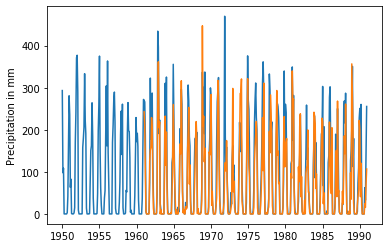

In [5]:
#kaoma_line = plot_object.Scatter(x = kaoma_df['Date'], y = kaoma_df['Precipitation'], mode = 'lines', name = 'kaoma precipitation')
#kasempa_line = plot_object.Scatter(x = kasempa_df['Date'], y = kasempa_df['Precipitation'], mode = 'lines', name = 'kasempa precipitation')
#plot_data = [kaoma_line, kasempa_line]
#plot.iplot(plot_data, filename='Monthly Precipitation Data')
matplotlib.pyplot.plot(kasempa_df['DateTime'], kasempa_df['Precipitation'])
matplotlib.pyplot.plot(kaoma_df['DateTime'], kaoma_df['Precipitation'])
matplotlib.pyplot.ylabel("Precipitation in mm")
matplotlib.pyplot.show()
#fails with Date as X but not DateTime?

How well correlated are these data?

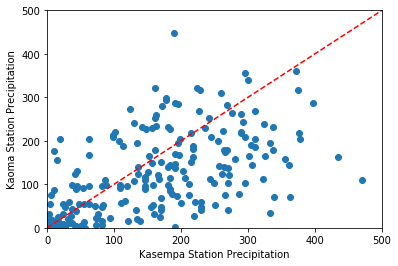

In [6]:
kasempa_overlap_df = kasempa_df.loc[kaoma_df.index.min(): kaoma_df.index.max()]
matplotlib.pyplot.axis([0, 500, 0, 500])
matplotlib.pyplot.plot([0, 500], [0, 500], 'r--')
matplotlib.pyplot.scatter(kasempa_overlap_df['Precipitation'], kaoma_df['Precipitation'])
matplotlib.pyplot.xlabel("Kasempa Station Precipitation")
matplotlib.pyplot.ylabel("Kaoma Station Precipitation")
matplotlib.pyplot.show()

In [7]:
combined_df = kasempa_overlap_df
combined_df = combined_df.rename(columns = {'Precipitation':'Kasempa Precipitation'})
combined_df['Kaoma Precipitation'] = kaoma_df['Precipitation']
print(combined_df[['Kaoma Precipitation','Kasempa Precipitation']].corr())

                       Kaoma Precipitation  Kasempa Precipitation
Kaoma Precipitation               1.000000               0.748638
Kasempa Precipitation             0.748638               1.000000


Here we create 2 annual time series one for Kaoma and one for Kasempa...

In [8]:
kaoma_year_df = kaoma_df.drop(['Year', 'Month', 'Season', 'Date'], axis = 1)
kaoma_year_df = kaoma_year_df.set_index('DateTime')
kaoma_year_df = kaoma_year_df.resample("Y").sum()
kaoma_year_df.head()

,Precipitation
DateTime,
1961-12-31,989.4
1962-12-31,1226.6
1963-12-31,879.7
1964-12-31,697.2
1965-12-31,706.4


In [9]:
kasempa_year_df = kasempa_df.drop(['Year', 'Month', 'Season', 'Date'], axis = 1)
kasempa_year_df = kasempa_year_df.set_index('DateTime')
kasempa_year_df = kasempa_year_df.resample("Y").sum()
kasempa_year_df.head()

,Precipitation
DateTime,
1950-12-31,994.9
1951-12-31,1181.1
1952-12-31,1219.9
1953-12-31,1154.6
1954-12-31,989.0


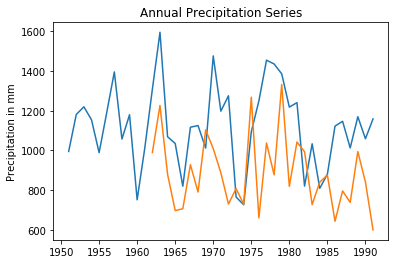

In [10]:
matplotlib.pyplot.plot(kasempa_year_df.index, kasempa_year_df['Precipitation'])
matplotlib.pyplot.plot(kaoma_year_df.index, kaoma_year_df['Precipitation'])
matplotlib.pyplot.title("Annual Precipitation Series")
matplotlib.pyplot.ylabel("Precipitation in mm")
matplotlib.pyplot.show()

How well is the annual data correlated (not well!)...

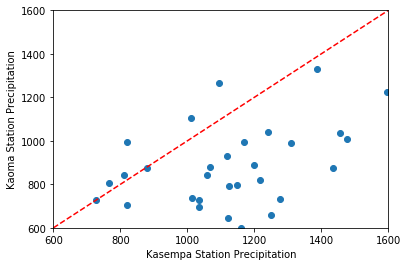

In [11]:
kasempa_overlap_year_df = kasempa_year_df.loc[kaoma_year_df.index.min(): kaoma_year_df.index.max()]
matplotlib.pyplot.axis([600, 1600, 600, 1600])
matplotlib.pyplot.plot([600, 1600], [600, 1600], 'r--')
matplotlib.pyplot.scatter(kasempa_overlap_year_df['Precipitation'], kaoma_year_df['Precipitation'])
matplotlib.pyplot.xlabel("Kasempa Station Precipitation")
matplotlib.pyplot.ylabel("Kaoma Station Precipitation")
matplotlib.pyplot.show()

In [12]:
combined_year_df = kasempa_overlap_year_df
combined_year_df = combined_year_df.rename(columns = {'Precipitation':'Kasempa Precipitation'})
combined_year_df['Kaoma Precipitation'] = kaoma_year_df['Precipitation']
print(combined_year_df[['Kaoma Precipitation','Kasempa Precipitation']].corr())

                       Kaoma Precipitation  Kasempa Precipitation
Kaoma Precipitation               1.000000               0.409918
Kasempa Precipitation             0.409918               1.000000


Ultimately the Kaoma station precipitation data was selected for analysis below are summary statistics describing the dataset.

In [13]:
cov = statistics.stdev(kaoma_year_df['Precipitation'])/kaoma_year_df['Precipitation'].mean()
skew = kaoma_year_df['Precipitation'].skew()
print(kaoma_year_df.describe())
print('coeffecient of variation '+str(cov))
print('skew                     '+str(skew))

       Precipitation
count      30.000000
mean      885.783333
std       185.172540
min       599.900000
25%       732.350000
50%       858.350000
75%       994.150000
max      1332.400000
coeffecient of variation 0.20904947453480896
skew                     0.7503592957741662


The Kaoma guage contains 30 years of data, which recieves an average of 885 mm of rainfall per year (as opposed to 1120 mm per year at the Kasempa station). A standard deviation in this rainfall total amounts to a 20% reduction or increase in the mean (18% for the Kasempa). The record shows moderate right side skew (0.75) (as opposed to the Kasempa guage which shows no skew (~0.04). For instance, the maximum value at the Kaoma station (1332 mm) is further above the mean than the minimum value (600 mm) is below it. 

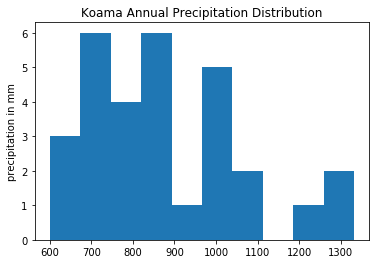

In [14]:
figure, plot = matplotlib.pyplot.subplots()
plot.set_title('Koama Annual Precipitation Distribution')
plot.set_ylabel('precipitation in mm')
#plot.boxplot(kaoma_year_df['Precipitation']);
matplotlib.pyplot.hist(kaoma_year_df['Precipitation'])
matplotlib.pyplot.show()

In [15]:
kaoma_monthly_dfs = kaoma_df.groupby('Month')['Precipitation'].apply(list)
#print(kaoma_monthly_dfs)

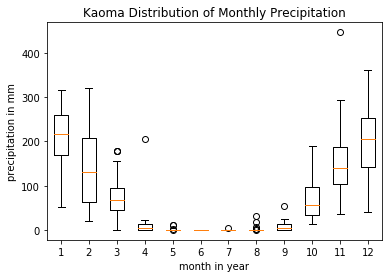

In [16]:
figure, plot = matplotlib.pyplot.subplots()
plot.set_title('Kaoma Distribution of Monthly Precipitation')
plot.set_ylabel('precipitation in mm')
plot.set_xlabel('month in year')
plot.boxplot(kaoma_monthly_dfs);

Below we develop 1,000 years of bootstrapped monthly precipitation data, stratified by month. This data is contained in a single 1,000 year long synthetic traces.

In [17]:
#Generate sample_df input for bootstrap method - 100 years of monthly data per trace
sample_list = list(range(1, 13, 1))
for i in range(1, 1, 1):
    sample_list.extend(list(range(1, 13, 1)))
sample_df = pandas.DataFrame(sample_list, columns = ['strata'])


#Format df input for bootstrap method
df = kaoma_df
df = df.rename(columns = {'Month':'strata'})
df = df.rename(columns = {'DateTime': 'variable_to_sample'})

#Bootstrap method 
def boostrap(df, sample_df):
    #df is a pandas dataframe it must have the following 2 columns: 'strata', 'variable_to_sample'
    #sample_df is a pandas dataframe it must have the following column: 'strata'
    stratalists = df.groupby('strata')['variable_to_sample'].apply(list)
    sample_df['trace'] = -999
    for index, row in sample_df.iterrows():
        sublist = stratalists[row['strata']]
        selected_date = sublist[int(random.random() / (1 / len(sublist)))]
        sample_df.loc[index, 'trace'] = pandas.to_datetime(selected_date, format='%Y-%m').date() 
    return sample_df
    # A multi-trace option - but I think its easier to split it after the bootstrap
    #for i in range(0, n_traces, 1):
    #    trace = 'trace_' + str(i + 1)
    #    sample_df[trace] = -999
    #    for index, row in sample_df.iterrows():
    #        sublist = stratalists[row['strata']]
    #        selected_date = sublist[int(random.random() / (1 / len(sublist)))]
    #        sample_df.loc[index, trace] = selected_date
    #return sample_df

##Calling Bootstrap Method - 10 traces (each 100 years long based on sample_df)
trace_dates = boostrap(df, sample_df)
trace_dates.head()

,strata,trace
0,1,1989-01-01
1,2,1990-02-01
2,3,1984-03-01
3,4,1969-04-01
4,5,1973-05-01


In [18]:
kaoma_df.head()
#WTF Date

,Year,Month,Season,Precipitation,Date,DateTime
0,1961,1,1,242.5,-999,1961-01-01
1,1961,2,1,209.1,-999,1961-02-01
2,1961,3,1,97.6,-999,1961-03-01
3,1961,4,1,5.6,-999,1961-04-01
4,1961,5,0,0.0,-999,1961-05-01


In [29]:
trace_df = trace_dates
trace_df['precip'] = -999
for index, row in trace_df.iterrows():
    sample_date = pandas.to_datetime(row['trace'])
    matching_row = kaoma_df[kaoma_df.DateTime == sample_date]
    print(matching_row.Precipitation)
    trace_df.loc[index, 'precip'] = matching_row.Precipitation
    #print(match)
    #trace_df.loc[index, 'precip'] = matches
trace_df.head()

336    269.5
Name: Precipitation, dtype: float64


ValueError: Incompatible indexer with Series

In [29]:
def fillin_precip(trace_df, obs_df, variable = 'Precipitation'):
    trace_df = trace_dates
    trace_df['precip'] = -999
    for index, row in trace_df.iterrows():
        sample_date = pandas.to_datetime(row['trace'])
        trace_df.loc[index, 'precip'] = obs_df[obs_df.DateTime == sample_date][variable]

trace_df = fillin_precip(trace_dates, kaoma_df)
trace_df.head()

ValueError: Incompatible indexer with Series

Here we create a new data frame holding the synthetically generated precipitation values rounded down toward the lower 10s place. This effectively places each synthetic precipitation value in a 10 mm wide bin, which is then used as strata from which synthetic temperature values are selected through bootstrapping. This allows for the full observed precipitation record (~1960 - 1990) to be used, even though the temperature records must be selected from the shorter 10 year period (~1980 - 1990) over which the precipitation and temperature records overlap.   

Note: that even in the overlapping period (~1980 - 1990) this stratified bootstrap approach is followed.

In [30]:
def bootstrap_temperature(trace_df, obs_df, variable):
    #round off observed precipitation values
    df = obs_df
    for index, row in df.iterrows():
        df.loc[index, 'Precipitation'] = math.floor(float(row['Precipitation']) * 10)
    for index, row in trace_df.iterrows():
        #if variable of interest is missing
        if row[variable] == -999:
            precip_strata = math.floor(float(row['Precipitation']) * 10)
    #get list of variable of interest wiht matching precip_strata
    
    
#all discard    
    for i in range(1, 13, 1):
        #a list of precipitation by month
        month_lists = obs_df.groupby('i')['Precipitation'].apply(lists)
    #round off precipitation values
    month_lists = [(math.floor(float(i)) * 10) for i in month_lists[i] ]
    for index, row in trace_df.iterrows():
        #if temp_min or temp_max are missing
        if row[variable] == -999:
            precip_strata = math.floor(row['Precipitation']) * 10
            
    
    for i in range(1, 13, 1):
        strata_lists = math.floor(float())
        stratalists = df.groupby('strata')['variable_to_sample'].apply(list)
    
    for index, row in trace_df.iterrows():
        if row[variable] == -999:
            



for i in range(1, 11, 1):
    col = 'sample_'+str(i)
    sample_temp_list = [(math.floor(float(i)) * 10) for i in (sample[col] / 10)]
    if i == 1:
        sample_temp_df = pandas.DataFrame(sample['strata'], columns = ['strata'])
    header = 'sample_'+str(i)
    sample_temp_df[header] = sample_temp_list
sample_temp_df.head()  

IndentationError: expected an indented block (<ipython-input-30-9589755f8076>, line 11)

The temperature and precipitation data do NOT overlap in time or space. The Kaoma precipitation data was recorded from January 1960 - December 1990. However, the temperature data was collected from the Kabwe station approximately 400 km to the East. THe Kabwe station contained records as far back as 1973. However only the period between January 1980 and December of 1997 was used in this analysis. Even within this shorter time period the time series is irregular as several months were missing values.

In [139]:
kabwe_df = pandas.read_csv("Inputs/Temperature_Kabwe.csv")
kabwe_df['Date'] = pandas.to_datetime(kabwe_df.Year.astype(str)+'-'+kabwe_df.Month.astype(str),format='%Y-%m')
kabwe_df.head()

,Month,Year,MaxTemp,MinTemp,Date
0,1,1980,27.7,16.4,1980-01-01
1,4,1980,26.0,17.0,1980-04-01
2,5,1980,26.0,10.4,1980-05-01
3,6,1980,21.5,7.1,1980-06-01
4,7,1980,22.4,8.5,1980-07-01


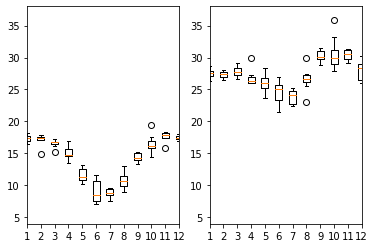

In [140]:
kabwe_mintemp_monthly_lists = kabwe_df.groupby('Month')['MinTemp'].apply(list)
kabwe_maxtemp_monthly_lists = kabwe_df.groupby('Month')['MaxTemp'].apply(list)
matplotlib.pyplot.subplot(121)
matplotlib.pyplot.boxplot(kabwe_mintemp_monthly_lists)
matplotlib.pyplot.axis([1, 12, 4, 38])
matplotlib.pyplot.subplot(122)
matplotlib.pyplot.boxplot(kabwe_maxtemp_monthly_lists)
matplotlib.pyplot.axis([1, 12, 4, 38])
matplotlib.pyplot.show()

In [141]:
strata_df = kabwe_df
strata_df['MinTemp'] = (strata_df['MinTemp'] * 10).astype(int)
strata_df.head()

,Month,Year,MaxTemp,MinTemp,Date
0,1,1980,27.7,164,1980-01-01
1,4,1980,26.0,170,1980-04-01
2,5,1980,26.0,104,1980-05-01
3,6,1980,21.5,71,1980-06-01
4,7,1980,22.4,85,1980-07-01


merge data frames based on date. round. collapse into strata. bootstrap. compare bootstrap to merged copy. compare bootstrap to historic data. readjust some bootstraps